# Using data to ask questions:<br>An introduction to statistical analysis of data in R
### DGN AP Biology 2018<br>Andrew Hipp, ahipp@mortonarb.org

You will recall that ca. two weeks ago, you collected height data on up to twelve individuals of a given species from each of several monocultures in our prairie. Every individual you measured had a few properties that might influence its height:

* <b>Species.</b> Some species, as you know, are taller than others.
* <b>Position in the plot.</b> Recall that we hypothesized that plants at the edge of the plot might be shorter because they are accidentally kneeled on when we weed the plots, in competition with grasses in the walkway, susceptible to herbicide overdraft.
* <b>Position of the plot in the experiment.</b> Some plots are uphill of others, and consequently there is a moisture and soil gradient that could influence height.

For today, we'll analyze the data to address four questions:

1. does position within the plot influence height on its own?
1. does species alone influence height?
1. does position influence height after we take into account variation among species?
1. does species influence height after we take into account variation among positions?

You'll notice that I have ignored plot position (where a plot is on the experimental site) for now. Ordinarily you would want to analyze this, but our sample size is a bit small to assess this, and we know from prior work that on this site, position within the experimental site has minimal effect.

You will address these questions using a open-source (read: free) software language called `R`. You should already have it downloaded on your computers, but you can download it at home as well from https://www.r-project.org/. If you are interested in math, statistics, or even language processing--`R` is a great programming language.

In the code below, I'll provide commands that do something you need to do with the data, often followed by commands that help you inspect what you have done. You can use this code as a model for how to analyze your own data in the future by copying it into a text editor, making changes that are relevant to your data and questions, then copying into `R` or using the `source` function in `R` to read the code in directly.

For now, what you are doing may seem confusing. Bear with it. If you study this code and work your way through it, by the _end_ you better understand what it is doing.

## 1. Read in your data

The first step in working with your data is to get the data into a format that R can use. Fortunately, Google Sheets allows you to export your data in a common format called the `xlsx` format: this is a proprietary format developed by Microsoft for their Excel spreadsheet software, but it is widely used across a range of softwares. `R` implements a method of reading in such files. 

We will first need to install what is called in `R` a package. A package is a group of functions written in the `R` language and possibly other languages that are compiled and interfaced with `R`. Packages exist to do almost anything you can imagine wanting to program, from making a movie to creating maps.  from another lnagu open a library that helps you read in 'xlsx' (MS Excel) files. First, install the `openxlsx` package:

In [1]:
install.packages('openxlsx', repos = "https://cloud.r-project.org")
library(openxlsx)

Installing package into 'C:/Users/andre/OneDrive/Documents/R/win-library/3.3'
(as 'lib' is unspecified)



  There is a binary version available but the source version is later:
         binary source needs_compilation
openxlsx 4.0.17  4.1.0              TRUE

  Binaries will be installed
package 'openxlsx' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\andre\AppData\Local\Temp\RtmpAJL2ej\downloaded_packages


Warning message:
"package 'openxlsx' was built under R version 3.3.3"

Now, you'll need to export your data out of Google Sheets as an XLSX file. I leave it to you to figure out how to do that in the future. For now, I've done this for you, and you can read the file in from the web. The commands below would work exactly the same if you had the file saved on your own computer: you would just substitute the file name and file path for the URL in the second line below. 

In [2]:
# First, attach (load in) the package using the 'library' function:
library(openxlsx)

# ... then, read the data in using 'read.xlsx'; the '1' in this command indicates that you are reading in the first sheet:
dat <- read.xlsx('http://systematics.mortonarb.org/transfers/DATA-2018-Students-AHedits.xlsx', 1)

## 2. Inspect your data
Whenever you read in a data file, you should inspect it to see how it looks. You can look at the top of the data set:

In [3]:
head(dat)

timestamp,plotNum,sp,plantLoc,height
43336.51,12,Heliopsis helianthoides,A,108
43336.51,12,Heliopsis helianthoides,A,132
43336.51,12,Heliopsis helianthoides,A,128
43336.51,12,Heliopsis helianthoides,A,130
43336.51,12,Heliopsis helianthoides,A,105
43336.51,12,Heliopsis helianthoides,A,125


... or the last 6 rows:

In [4]:
tail(dat)

,timestamp,plotNum,sp,plantLoc,height
3216,43336.58,911,Desmodium canadense,A,128
3217,43336.58,123d,Desmodium illinoense,B,123
3218,43336.58,59b,Bouteloua curtipendula,B,122
3219,43336.51,71s,Senna hebecarpa,A,150
3220,43336.51,71s,Senna hebecarpa,B,154
3221,43336.58,91d,Desmodium canadense,B,111


... or the names of the columns:

In [5]:
names(dat)

[1] "timestamp" "plotNum"   "sp"        "plantLoc"  "height"

You also might want to check out your species and plant locations, to make sure the data make sense:

In [6]:
sort(unique(dat$sp))
sort(unique(dat$plantLoc))
sort(unique(dat$plotNum))

[1] "Agastache nepetoides"          "Agastache scrophulariifolia"  
 [3] "Allium cernum"                 "Amorpha canescens"            
 [5] "Andropogon gerardii"           "Anemone canadensis"           
 [7] "Anemone cylindrica"            "Anemone virginiana"           
 [9] "Antennaria neglecta"           "Arnoglossum plantagineum"     
[11] "Asclepias sullivantii"         "Asclepias verticillata"       
[13] "Bouteloua curtipendula"        "Carex annectens"              
[15] "Carex bicknellii"              "Carex blanda"                 
[17] "Carex brevior"                 "Carex gravida"                
[19] "Carex molesta"                 "Carex normalis"               
[21] "Chamaecrista fasciculata"      "Coreopsis palmata"            
[23] "Dalea candida"                 "Dalea purpurea"               
[25] "Desmanthus illinoense"         "Desmodium canadense"          
[27] "Desmodium illinoense"          "Echinacea pallida"            
[29] "Echinacea purpurea"            "Elymus canadensis"            
[31] "Eragrostis spectabilis"        "Eupatorium altissimum"        
[33] "Euphorbia corollata"           "Euthamia graminifolia"        
[35] "Gentiana andrewsii"            "Helenium autumnale"           
[37] "Helianthus mollis"             "Helianthus occidentalis"      
[39] "Helianthus pauciflorus"        "Heliopsis helianthoides"      
[41] "Heuchera richardsonii"         "Hierochloe odorata"           
[43] "Hypericum pyramidatum"         "Juncus dudleyi"               
[45] "Juncus interior"               "Juncus tenuis"                
[47] "Koeleria macrantha"            "Lespedeza capitata"           
[49] "Maianthemum racemosum"         "Monarda bradburiana"          
[51] "Monarda fistulosa"             "Oligoneuron rigidum"          
[53] "Panicum virgatum"              "Penstemon digitalis"          
[55] "Penstemon hirsutus"            "Phlox pilosa"                 
[57] "Physostegia virginiana"        "Polemonium reptans"           
[59] "Polygonatum biflorum"          "Potentilla arguta"            
[61] "Pycnanthemum pilosum"          "Pycnanthemum tenuifolium"     
[63] "Pycnanthemum virginianum"      "Ratibida pinnata"             
[65] "Rosa blanda"                   "Rosa carolina"                
[67] "Rosa setigera"                 "Rudbeckia fulgida"            
[69] "Rudbeckia hirta"               "Rudbeckia subtomentosa"       
[71] "Rudbeckia triloba"             "Ruellia humilis"              
[73] "Schizachyrium scoparium"       "Senna hebecarpa"              
[75] "Senna marilandica"             "Silphium integrifolium"       
[77] "Sisyrinchium angustifolium"    "Solidago juncea"              
[79] "Solidago nemoralis"            "Sorghastrum nutans"           
[81] "Spiraea alba"                  "Sporobolus heterolepis"       
[83] "Symphyotrichum ericoides"      "Symphyotrichum laeve"         
[85] "Symphyotrichum novae-angliae"  "Symphyotrichum oolentangiense"
[87] "Symphyotrichum sericeum"       "Teucrium canadense"           
[89] "Thalictrum dasycarpum"         "Verbena stricta"              
[91] "Vernonia fasciculata"          "Vernonia gigantea"            
[93] "Vernonia missurica"            "Veronicastrum virginicum"     
[95] "Viola pedatifida"

[1] "A" "B" "C"

[1] "100"  "101"  "106"  "109"  "111"  "112"  "114"  "115"  "117"  "118" 
 [11] "12"   "121"  "123"  "123d" "126"  "127"  "129"  "130"  "132"  "133" 
 [21] "134"  "136"  "137"  "140"  "141"  "142"  "146"  "153"  "155"  "157" 
 [31] "16"   "165"  "166"  "168"  "17"   "173"  "174"  "175"  "176"  "177" 
 [41] "178"  "18"   "180"  "186"  "187"  "189"  "190"  "191"  "193"  "197" 
 [51] "198"  "20"   "200"  "202"  "203"  "204"  "206"  "207"  "208"  "209" 
 [61] "21"   "210"  "212"  "213"  "214"  "25"   "260"  "27"   "272"  "299" 
 [71] "30"   "32"   "363"  "384"  "39"   "40"   "41"   "411"  "415"  "417" 
 [81] "43"   "46"   "51"   "53"   "54"   "57"   "59"   "59b"  "63"   "65"  
 [91] "66"   "71"   "71s"  "72"   "76"   "77"   "80"   "81"   "84"   "86"  
[101] "89"   "91"   "911"  "91d"  "93"   "97"

Just scanning through this list, you can see that the species all look good, and the plot positions all look good: we only see good species names and "A", "B" or "C" as plot positions. However, there is something odd with our plots: some have a letter appended ('b' or 'd' or 's') and one is too large ('911' is not a plot number in our experiment). These need to be edited, and if you are using these data for anything, you should take time to do so. For now, we will exclude these plots using this command:

In [7]:
dat <- dat[which(!is.na(as.numeric(dat$plotNum))), ]
sort(unique(dat$plotNum))

Warning message in which(!is.na(as.numeric(dat$plotNum))):
"NAs introduced by coercion"

[1] "100" "101" "106" "109" "111" "112" "114" "115" "117" "118" "12"  "121"
 [13] "123" "126" "127" "129" "130" "132" "133" "134" "136" "137" "140" "141"
 [25] "142" "146" "153" "155" "157" "16"  "165" "166" "168" "17"  "173" "174"
 [37] "175" "176" "177" "178" "18"  "180" "186" "187" "189" "190" "191" "193"
 [49] "197" "198" "20"  "200" "202" "203" "204" "206" "207" "208" "209" "21" 
 [61] "210" "212" "213" "214" "25"  "260" "27"  "272" "299" "30"  "32"  "363"
 [73] "384" "39"  "40"  "41"  "411" "415" "417" "43"  "46"  "51"  "53"  "54" 
 [85] "57"  "59"  "63"  "65"  "66"  "71"  "72"  "76"  "77"  "80"  "81"  "84" 
 [97] "86"  "89"  "91"  "911" "93"  "97"

What the above command does is try to coerce every plot label to a number. Those that can't become an `NA` in `R` (Excel and Google sheets yield a similar problem if they try to look up data that doesn't exist). We then filter out the rows of the data sheet that have NAs in them. You can see that we were successful by inspecting the plot numbers above: they all look good.

Let's also look at our plant heights to make sure none are implausible. We'll use a histogram, which shows us the distribution of any number:

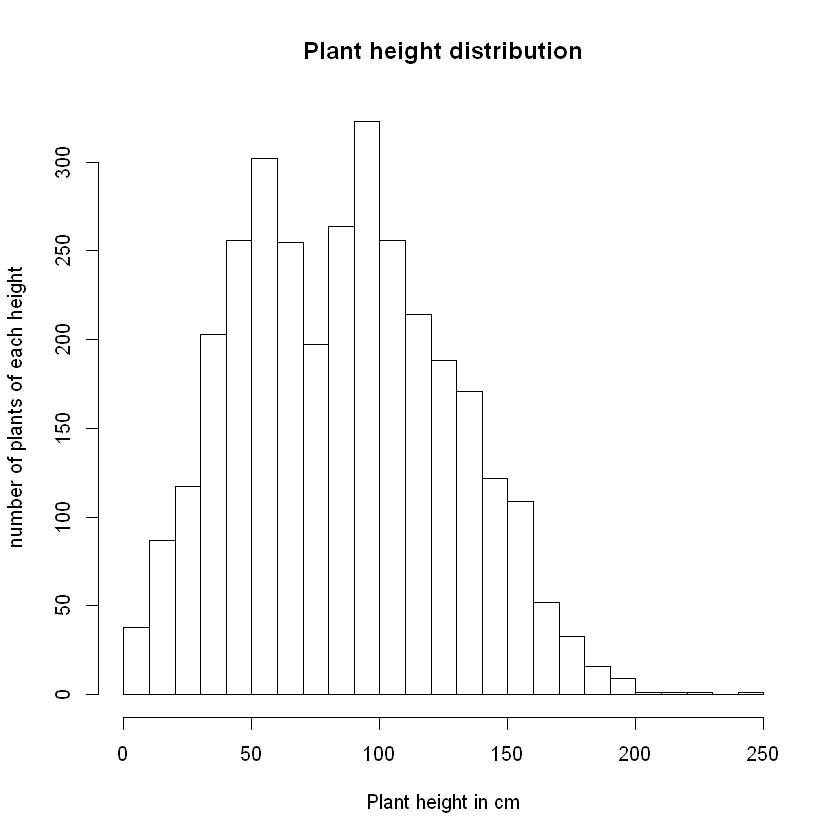

In [8]:
hist(dat$height, 20, xlab = "Plant height in cm", ylab = "number of plants of each height", main = "Plant height distribution")

Looks good! No outlandish heights... 2.5 m is rather tall, 8.2 feet. But recall how tall some of those plants were. Some were much taller than anyone in the group. We're okay. Also, no negative heights. This is good: very few plants have negative heights, nor imaginary heights.

Next, we convert species, plot number and plant location to factors; this is a categorical data type used by R in part to let analysis functions know that a variable should not be treated as numeric.

In [9]:
dat$plotNum <- as.factor(dat$plotNum)
dat$plantLoc <- as.factor(dat$plantLoc)
dat$sp <- as.factor(dat$sp)

Once we've done this, we are ready to format our data for analysis!

## 3. Format data for analysis
We are getting so close. Recall that we took four measurements per plant position per plot. If we count _all_ those measurements separately, we may fool ourselves into thinking we have more information than we really do, unless we account for the fact that the plants growing in a single plot are actually expected to be more similar to each other than they are to plants in a different plot. If we were analyzing each plot all on its own, and we had 10 or 20 plants per position per plot, we might investigate each plot separately, and ask whether each plot shows an edge effect. But we would be still be left with the question of whether there is an overall edge effect when you average across plots. Moreover, we don't have enough samples per plot to get a very satisfying plot-by-plot answer. So what can we do?

The simplest way is to treat all samples in a given plot (e.g., plot 191) in a given position (e.g., ring 'A') noisy estimators of the height for that ring of that plot. In this case, we would average all the plants of a given ring for each plot, so that each plot has one height per ring. Let's see what this looks like. First, let's just look at plot 140:

In [10]:
dat[dat$plotNum == '140', ]

,timestamp,plotNum,sp,plantLoc,height
1837,43336.58,140,Agastache nepetoides,A,82
1838,43336.58,140,Agastache nepetoides,A,132
1839,43336.58,140,Agastache nepetoides,A,108
1840,43336.58,140,Agastache nepetoides,A,106
1841,43336.58,140,Agastache nepetoides,A,90
1842,43336.58,140,Agastache nepetoides,A,84
1843,43336.58,140,Agastache nepetoides,A,102
1844,43336.58,140,Agastache nepetoides,A,100
1845,43336.58,140,Agastache nepetoides,B,91
1846,43336.58,140,Agastache nepetoides,B,98


That's a lot of measurements. How can we average? `R` makes this easy using the `aggregate` function. If we want, for example to average by species, we would do as follows:

In [11]:
heights.by.sp <- aggregate(dat$height, by = list(dat$sp), FUN = mean)
head(heights.by.sp)

Group.1,x
Agastache nepetoides,103.00000
Agastache scrophulariifolia,142.27027
Allium cernum,62.22222
Amorpha canescens,26.80000
Andropogon gerardii,50.75000
Anemone canadensis,43.70833


Pretty nice: no sitting around manually calculating averages for each of the 96 species in our experiment. But this isn't quite what we want. We actually want to average by the combination of species + plantLoc, so that we get one value per species per plot per ring of that plot. (If we had replicates of species, we'd also include plot in this, but our species were not replicated, and adding in plot numbers appears to introduce some errors in the data.) To do this, we'll use the command we used above, but we'll change `by` to be a text string that combines all three of these elements:

In [12]:
#myPlotFactor <- paste(dat$sp, dat$plotNum, dat$plantLoc, sep = "|")
myPlotFactor <- paste(dat$sp, dat$plantLoc, sep = "|")
head(myPlotFactor, 40)

[1] "Heliopsis helianthoides|A" "Heliopsis helianthoides|A"
 [3] "Heliopsis helianthoides|A" "Heliopsis helianthoides|A"
 [5] "Heliopsis helianthoides|A" "Heliopsis helianthoides|A"
 [7] "Heliopsis helianthoides|A" "Heliopsis helianthoides|A"
 [9] "Heliopsis helianthoides|A" "Heliopsis helianthoides|A"
[11] "Heliopsis helianthoides|A" "Heliopsis helianthoides|A"
[13] "Heliopsis helianthoides|A" "Heliopsis helianthoides|A"
[15] "Heliopsis helianthoides|A" "Heliopsis helianthoides|A"
[17] "Heliopsis helianthoides|A" "Heliopsis helianthoides|A"
[19] "Heliopsis helianthoides|A" "Heliopsis helianthoides|B"
[21] "Heliopsis helianthoides|B" "Heliopsis helianthoides|B"
[23] "Heliopsis helianthoides|B" "Heliopsis helianthoides|B"
[25] "Heliopsis helianthoides|B" "Heliopsis helianthoides|B"
[27] "Heliopsis helianthoides|B" "Heliopsis helianthoides|B"
[29] "Heliopsis helianthoides|B" "Heliopsis helianthoides|B"
[31] "Heliopsis helianthoides|B" "Heliopsis helianthoides|B"
[33] "Heliopsis helianthoides|B" "Heliopsis helianthoides|B"
[35] "Heliopsis helianthoides|B" "Heliopsis helianthoides|C"
[37] "Heliopsis helianthoides|C" "Heliopsis helianthoides|C"
[39] "Heliopsis helianthoides|C" "Heliopsis helianthoides|C"

Do you see what we've done? Now each row of our data has a corresponding element in `myPlotFactor` that combines the species and plot position of each plant. You'll notice that in fact we have more than 4 measurements per ring for some plots, because many plots were measured by more than group. How much replication was there on average? Let's look at the distribution of counts per plot per ring:

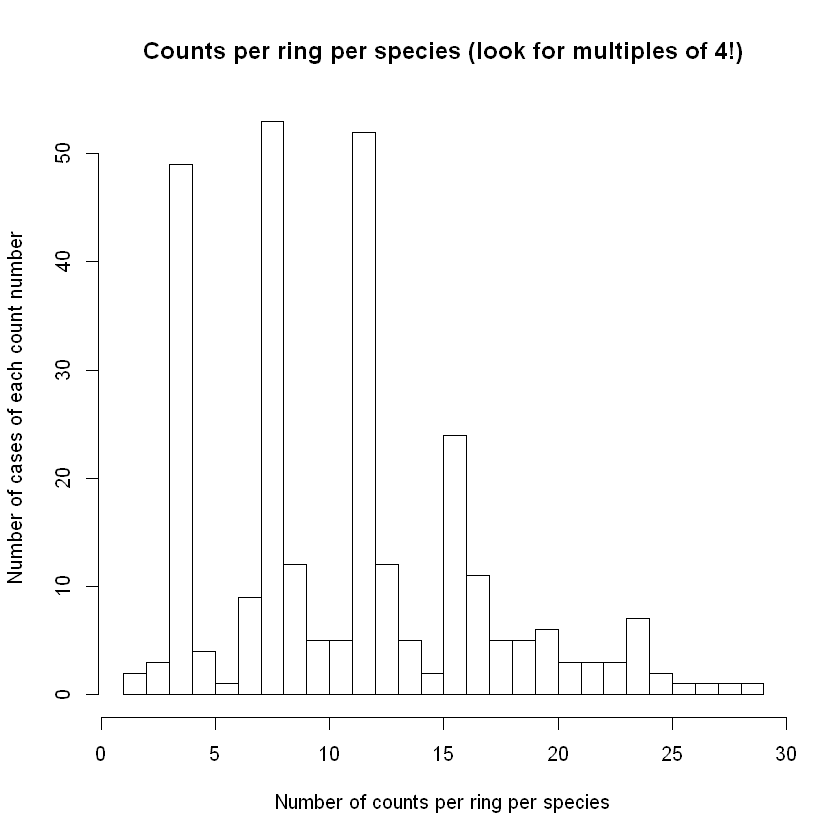

In [13]:
hist(table(myPlotFactor), 20, xlab = "Number of counts per ring per species", ylab = "Number of cases of each count number", 
    main = "Counts per ring per species (look for multiples of 4!)")

You can see that the largest number of species / ring combinations had four, eight, or twelve counts, the next largest had 16: most species, then, were measured by one to three groups, a few were measured by four groups, and some plots had few enough plants that not all 12 targeted measurements were made per plot. Fair enough!

Okay. Enough yakking. Let's aggregate:

In [14]:
dat.agg <- aggregate(dat$height, by = list(myPlotFactor), FUN = mean)
names(dat.agg)[[2]] <- 'height'
head(dat.agg)

Group.1,height
Agastache nepetoides|A,93.77778
Agastache nepetoides|B,103.37500
Agastache nepetoides|C,111.88889
Agastache scrophulariifolia|A,129.08333
Agastache scrophulariifolia|B,151.61538
Agastache scrophulariifolia|C,145.33333


So now we have data averaged by species and position within the plot. That's nice. Let's add back in a column for species and plant location... we won't get hung up on the details of how this is being done for now, but we'll verify that it is done right by checking the data using `head`:

In [15]:
dat.agg$sp <- factor(sapply(strsplit(dat.agg$Group.1, "|", fixed = T), function(x) x[1]),
                     levels = as.character(heights.by.sp$Group.1[order(heights.by.sp$x)]))
dat.agg$plantLoc <- factor(sapply(strsplit(dat.agg$Group.1, "|", fixed = T), function(x) x[2]))
head(dat.agg)

Group.1,height,sp,plantLoc
Agastache nepetoides|A,93.77778,Agastache nepetoides,A
Agastache nepetoides|B,103.37500,Agastache nepetoides,B
Agastache nepetoides|C,111.88889,Agastache nepetoides,C
Agastache scrophulariifolia|A,129.08333,Agastache scrophulariifolia,A
Agastache scrophulariifolia|B,151.61538,Agastache scrophulariifolia,B
Agastache scrophulariifolia|C,145.33333,Agastache scrophulariifolia,C


... and let's see how our data are distributed both by position within plots and by species. Box plots show us the average, quantile, and range of our data by any predictor. Here, we'll layout a two-panel plot using the `layout` function, set the margins using `par`, and then make two box plots, one summarizing data by species, one by plant location.

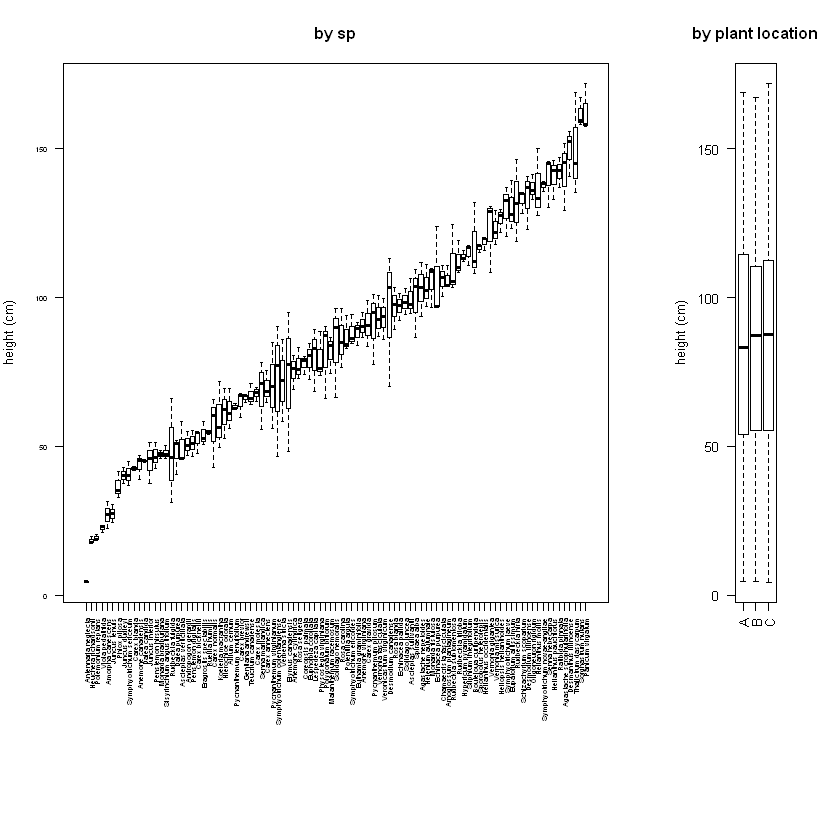

In [16]:
layout(matrix(c(rep(1,4), 2), 1))
par(mar = c(15,4,4,4))
boxplot(height ~ sp, dat.agg, las = 2, main = 'by sp', ylab = 'height (cm)', cex.axis = 0.5)
boxplot(height ~ plantLoc, dat.agg, las = 2, main = 'by plant location', ylab = 'height (cm)')

We're almost there! What does the data visualization suggest to you? Let's test the effects of each factor formally using one-way and two-way analysis of variance (ANOVA). Here we are using ANOVA to ask whether each of two categorical predictors (plant location and species) has an effect on height--these are the one-way ANOVAs--and whether each predictor influences plant height after correcting for the effect of the other.

In [17]:
analysis <- list(
    L = aov(height ~ plantLoc, data = dat.agg),
    S = aov(height ~ sp, data = dat.agg),
    LS = aov(height ~ plantLoc + sp, data = dat.agg)
    )
lapply(analysis, summary)

$L
             Df Sum Sq Mean Sq F value Pr(>F)
plantLoc      2    280   139.8   0.102  0.903
Residuals   284 388660  1368.5               

$S
             Df Sum Sq Mean Sq F value Pr(>F)    
sp           94 374215    3981   53.21 <2e-16 ***
Residuals   190  14216      75                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
2 observations deleted due to missingness

$LS
             Df Sum Sq Mean Sq F value Pr(>F)    
plantLoc      2    342     171   2.315  0.102    
sp           94 374215    3981  53.945 <2e-16 ***
Residuals   188  13874      74                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
2 observations deleted due to missingness


In the ANOVA tables above, the F-value tells you the ratio of variance between groups to variation within groups: the higher the F-value, the more the grouping (species or plant location) explains the total variation in plant height. The p-value estimates the probability of observing an F-value as large as or larger than you observed if there were really no effect of the factor you are investigating. Stated another way, a very low p-value (<< 1) suggests that the factor probably is really affecting height, whereas a p-value approaching 1 likely means that there is no effect of teh factor on plant height.

## 4. What do you conclude from all this?
Now, friends: what do you conclude from the data you collected and the analyses you've conducted? Discuss the following questions:

1. Do the analyses we've conducted suggest that we have an edge effect? Why or why not? How strongly or how weakly do the analyses support one hypothesis versus another?
2. Does the analysis you conducted jive with what you observed in the field? Why or why not? Stated another way, what would you have expected the analysis to show, and did it show that?
3. What unmeasured factors might be influencing your results?
4. Are there any aspects of how data were gathered that might affect your results?
5. What questions are you left with from this work? What sets of observations could you make to refine your results or address new questions?